In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import skimage.morphology
import os
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from skimage.io import imread
from skimage import exposure

## Memory (in bytes)

In [31]:
img_hanburger = skimage.io.imread("hamburger.jpg")
print(img_hanburger.size)

783126


## Images produced histograms

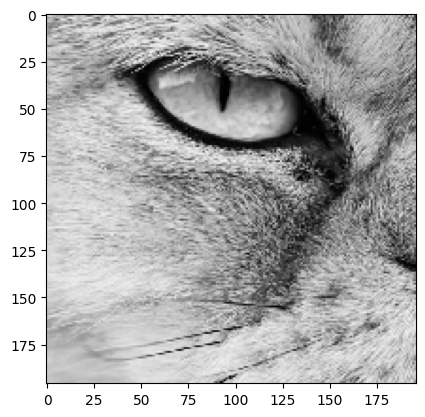

(array([ 37.,  26.,  85.,  73.,  57.,  59.,  45.,  53.,  48.,  65.,  60.,
         54.,  55.,  36.,  46.,  42.,  51.,  42.,  55.,  49.,  37.,  36.,
         50.,  39.,  38.,  37.,  43.,  33.,  36.,  44.,  39.,  39.,  81.,
          0.,  45.,  40.,  73.,   0.,  38.,  52.,  97.,   0.,  33.,  45.,
        100.,   0.,  47.,  68.,  93.,   0.,  55.,   0.,  50., 118.,   0.,
         69.,  58.,  93.,   0.,  52.,  45., 134.,   0.,  54.,  51.,  49.,
        130.,   0.,  60.,  57.,  58.,  58.,  67.,  70., 145.,   0.,  89.,
         77.,  81.,  62.,  76.,  56., 158.,   0.,  81.,  71.,  96.,  80.,
         67.,  88., 177.,   0.,  89.,  71.,  90., 107.,  82.,  87., 170.,
          0.,  82., 114.,   0., 105.,  88.,  96.,  97., 196.,   0.,  98.,
        104., 123., 107., 119., 100., 201.,   0., 123., 114., 122., 116.,
        131., 138., 234.,   0., 119., 119., 121., 125., 124., 140., 143.,
        128., 300.,   0., 158., 133., 133., 149., 147., 153., 145., 155.,
        154., 141., 193., 183., 192., 

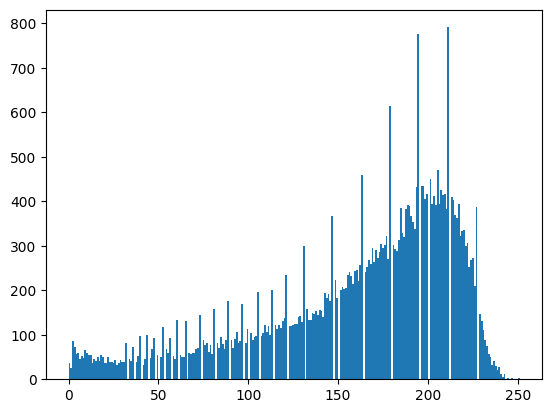

In [65]:
image1 = skimage.io.imread("image1.png")

plt.imshow(image1)
plt.show()

r, g, b = image1[:, :, 0], image1[:, :, 1], image1[:, :, 2]
plt.hist(r.ravel(), bins=256)

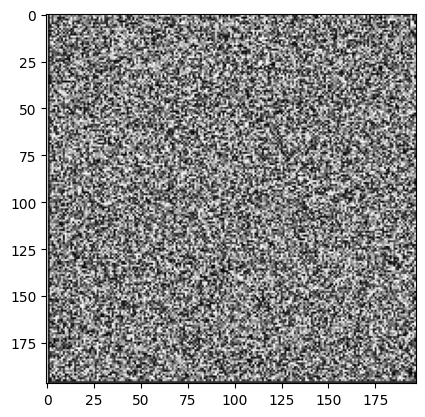

(array([165., 155., 164., 135., 153., 138., 142., 146., 158., 136., 145.,
        148., 174., 147., 154., 153., 139., 148., 150., 159., 167., 140.,
        146., 144., 149., 151., 169., 174., 155., 162., 171., 125., 323.,
          5., 162., 133., 286.,   7., 148., 130., 289.,   5., 133., 158.,
        295.,   3., 143., 151., 306.,   2., 141., 368., 283.,   0., 165.,
        138., 277.,   0., 146., 167., 280.,   0., 160., 164., 139., 281.,
          0., 159., 167., 148., 140., 138., 138., 277.,   0., 162., 135.,
        162., 166., 139., 152., 315.,   0., 153., 182., 147., 150., 144.,
        131., 277.,   0., 136., 134., 148., 147., 159., 170., 276.,   0.,
        141., 153., 169., 130., 169., 142., 303.,   0., 137., 158., 151.,
        144., 144., 164., 309.,   0., 138., 135., 146., 136., 127., 147.,
        306.,   0., 152., 149., 147., 129., 154., 127., 165., 135., 312.,
          0., 167., 158., 152., 145., 129., 173., 143., 151., 142., 144.,
        137., 162., 145., 150., 315., 

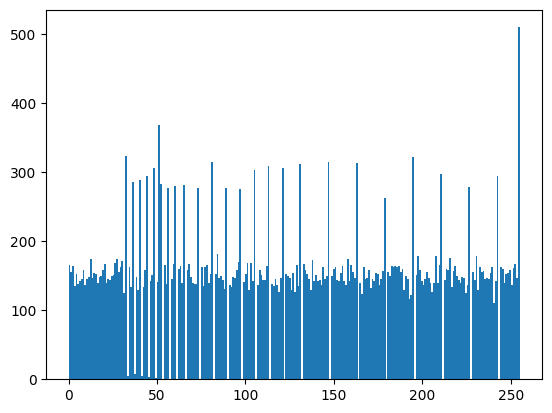

In [64]:
image2 = skimage.io.imread("image2.png")

plt.imshow(image2)
plt.show()

r, g, b = image2[:, :, 0], image2[:, :, 1], image2[:, :, 2]
plt.hist(r.ravel(), bins=256)

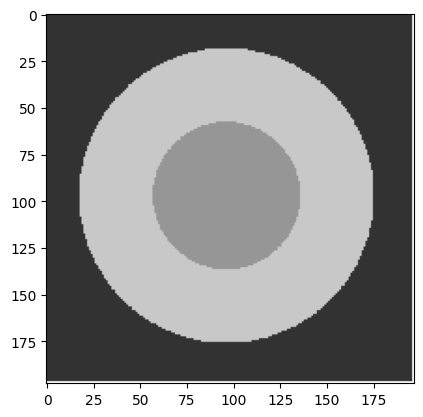

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8715e+04, 3.9100e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

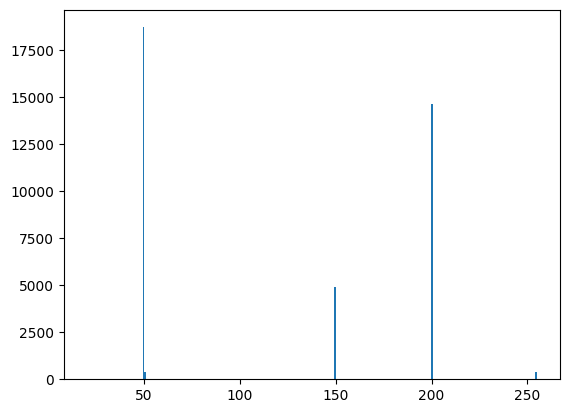

In [63]:
image3 = skimage.io.imread("image3.png")

plt.imshow(image3)
plt.show()

r, g, b = image3[:, :, 0], image3[:, :, 1], image3[:, :, 2]
plt.hist(r.ravel(), bins=256)

##  The mean brightness of channels in the hamburger image

In [35]:
r, g, b = img_hanburger [:, :, 0], img_hanburger [:, :, 1], img_hanburger [:, :, 2]
print(r.mean().round(2))
print(g.mean().round(2))
print(b.mean().round(2))

90.09
84.07
36.79


## Perform binary opening on channel using a 3x3 square as the structuring element and get white pixels

In [36]:
print(r)
str_element = skimage.morphology.square(3)
binary_img = skimage.morphology.binary_opening(b, str_element)

rows = binary_img.shape[0]
columns = binary_img.shape[1] 
count = 0
for row in range(0, rows):
    for value in binary_img[row]:
        if value == 1:
            count += 1;

print('Number of white pixels:', count)

[[39 39 40 ... 10 11 11]
 [39 40 40 ... 11 11 11]
 [40 40 40 ... 11 10 10]
 ...
 [35 40 44 ... 12 13 12]
 [22 27 34 ... 20 16 15]
 [24 28 27 ... 25 22 23]]
Number of white pixels: 182990


## How many times words "pride" and "prejudice" occur in the document

In [12]:
text = ""
with open("text.txt", "r", encoding = "utf-8") as f:
    text = f.read()
words = re.split("\W+", text.lower())
counter = Counter(words)
print(counter["pride"])
print(counter["prejudice"])


59
15


## Remove all stopwords, count all remaining words and find the protagonist (main character) in the book

In [37]:
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
clean_words = [w for w in words if w not in stop_words]

In [39]:
counter_clean_words = Counter(clean_words)
counter_clean_words.most_common(10)

[('mr', 807),
 ('elizabeth', 645),
 ('could', 531),
 ('would', 482),
 ('darcy', 430),
 ('said', 406),
 ('mrs', 353),
 ('bennet', 339),
 ('much', 336),
 ('must', 322)]